In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importante: O exemplo GIANTSTEPS3519546.LOFI não pode ser utilizado. Tempo mais curto que a janela.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import shutil
#shutil.copy2("/content/drive/MyDrive/utilities.py", "/content/utilities.py")
#shutil.copy2("/content/drive/MyDrive/ConvNet3DSpecShanMorl.py", "/content/ConvNet3DSpecShanMorl.py")
#shutil.copy2("/content/drive/MyDrive/config.py", "/content/config.py")

'/content/config.py'

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.data import AUTOTUNE
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import os
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import Audio, clear_output, display
from glob import glob
import random

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras import layers, models


In [3]:
BS = 32 #batch size

base_model = VGG16(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x) # Modificação para adicionar regularização no topo.
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 300, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 150, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 14,781,642 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

# k=1

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento1.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training1")
VAL_DATASET = os.path.join("/content", "validation1")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 VGG-specific normalization
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 ResNet-specific normalization

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

optimizer = keras.optimizers.Adam(learning_rate=1e-3)


base_model.trainable = False
#for layer in base_model.layers[:-80]:  # ou -100
#    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 742ms/step - accuracy: 0.1655 - loss: 5.4689 - val_accuracy: 0.4200 - val_loss: 1.6672
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.3750 - loss: 2.0245 - val_accuracy: 0.5000 - val_loss: 1.3927
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.5022 - loss: 1.4766 - val_accuracy: 0.5800 - val_loss: 1.2085
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.5128 - loss: 1.3916 - val_accuracy: 0.6050 - val_loss: 1.1677
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.5734 - loss: 1.2376 - val_accuracy: 0.6150 - val_loss: 1.0727
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.6019 - loss: 1.1183 - val_accuracy: 0.6500 - val_loss: 1.0499
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.5953 - loss: 1.1643 - val_accuracy: 0.6450 - val_loss: 1.0437
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.6228 - loss: 1.0394 - 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-6]:
    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 0.9523 - loss: 0.1749 - val_accuracy: 0.7600 - val_loss: 0.8774
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.9624 - loss: 0.1821 - val_accuracy: 0.7600 - val_loss: 0.8692
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.9685 - loss: 0.1297 - val_accuracy: 0.7600 - val_loss: 0.8633
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.9713 - loss: 0.1441 - val_accuracy: 0.7550 - val_loss: 0.8608
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.9632 - loss: 0.1606 - val_accuracy: 0.7500 - val_loss: 0.8578
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.9849 - loss: 0.1341 - val_accuracy: 0.7550 - val_loss: 0.8554
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9637 - loss: 0.1516 - val_accuracy: 0.7550 - val_loss: 0.8533
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step - accuracy: 0.9728 - loss: 0.1408 - val_accu

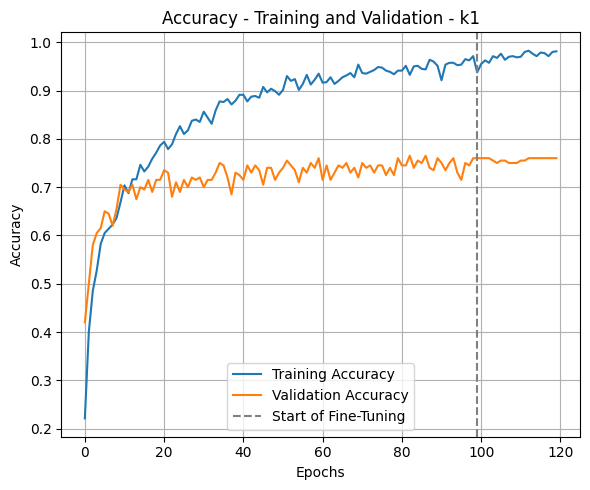

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/accuracy_genre_mel_k1.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/acc_total_k1.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/val_acc_total_k1.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k1.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


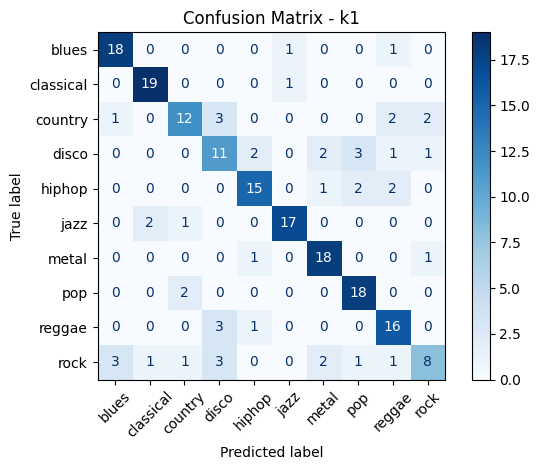

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k1")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/confusionmatrix_genre_mel_k1.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=2

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento2.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training2")
VAL_DATASET = os.path.join("/content", "validation2")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 VGG-specific normalization
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 VGG-specific normalization
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 VGG-specific normalization

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


base_model.trainable = False


model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 751ms/step - accuracy: 0.1560 - loss: 4.4503 - val_accuracy: 0.4150 - val_loss: 1.7234
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.3533 - loss: 1.8286 - val_accuracy: 0.4750 - val_loss: 1.4012
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - accuracy: 0.4693 - loss: 1.5326 - val_accuracy: 0.5600 - val_loss: 1.2659
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.5261 - loss: 1.3855 - val_accuracy: 0.6150 - val_loss: 1.2024
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.5731 - loss: 1.2341 - val_accuracy: 0.6650 - val_loss: 1.0762
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.6159 - loss: 1.1042 - val_accuracy: 0.6200 - val_loss: 1.0999
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.5701 - loss: 1.1748 - val_accuracy: 0.6250 - val_loss: 1.0563
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.6246 - loss: 1.0877 - 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-6]:
    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 412ms/step - accuracy: 0.9764 - loss: 0.1308 - val_accuracy: 0.7550 - val_loss: 1.0406
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9738 - loss: 0.1302 - val_accuracy: 0.7550 - val_loss: 1.0331
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9755 - loss: 0.1302 - val_accuracy: 0.7550 - val_loss: 1.0277
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9755 - loss: 0.1165 - val_accuracy: 0.7500 - val_loss: 1.0222
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9812 - loss: 0.1157 - val_accuracy: 0.7500 - val_loss: 1.0189
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9839 - loss: 0.1056 - val_accuracy: 0.7500 - val_loss: 1.0125
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.9814 - loss: 0.1016 - val_accuracy: 0.7550 - val_loss: 1.0079
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9904 - loss: 0.0975 - val_accu

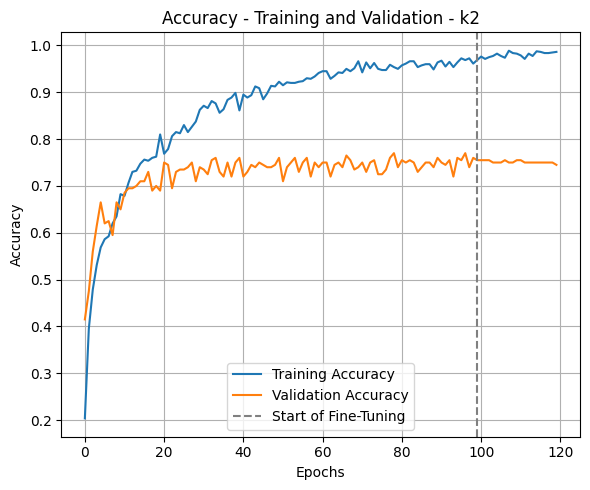

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/accuracy_genre_mel_k2.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/acc_total_k2.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/val_acc_total_k2.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k2.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


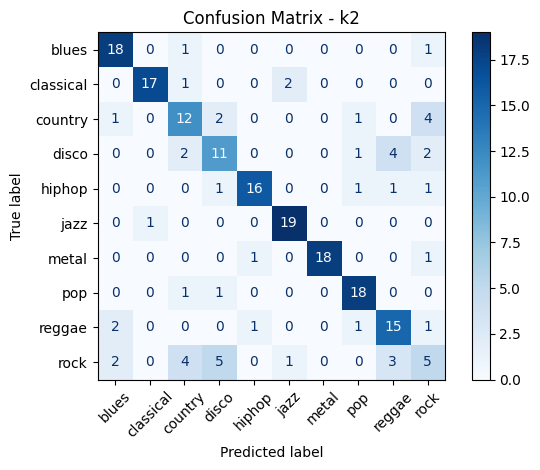

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k2")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/confusionmatrix_genre_mel_k2.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=3

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento3.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training3")
VAL_DATASET = os.path.join("/content", "validation3")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 ResNet-specific normalization

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


base_model.trainable = False
#for layer in base_model.layers[:-80]:  # ou -100
#    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 794ms/step - accuracy: 0.1336 - loss: 5.7883 - val_accuracy: 0.3900 - val_loss: 1.9032
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step - accuracy: 0.3490 - loss: 2.0153 - val_accuracy: 0.4550 - val_loss: 1.5631
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.4882 - loss: 1.5192 - val_accuracy: 0.5150 - val_loss: 1.4542
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.5113 - loss: 1.5136 - val_accuracy: 0.5500 - val_loss: 1.2991
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.5756 - loss: 1.2910 - val_accuracy: 0.5500 - val_loss: 1.2867
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.6051 - loss: 1.1734 - val_accuracy: 0.6100 - val_loss: 1.2075
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 435ms/step - accuracy: 0.6363 - loss: 1.1311 - val_accuracy: 0.6050 - val_loss: 1.2034
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - accuracy: 0.6459 - loss: 1.0243 - 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-6]:
    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 438ms/step - accuracy: 0.9618 - loss: 0.1734 - val_accuracy: 0.6600 - val_loss: 1.5999
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.9681 - loss: 0.1348 - val_accuracy: 0.6550 - val_loss: 1.5690
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.9749 - loss: 0.1233 - val_accuracy: 0.6600 - val_loss: 1.5418
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.9759 - loss: 0.1075 - val_accuracy: 0.6600 - val_loss: 1.5236
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.9696 - loss: 0.1372 - val_accuracy: 0.6550 - val_loss: 1.5019
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.9752 - loss: 0.1147 - val_accuracy: 0.6600 - val_loss: 1.4891
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.9803 - loss: 0.1000 - val_accuracy: 0.6650 - val_loss: 1.4826
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.9802 - loss: 0.1042 - val_accu

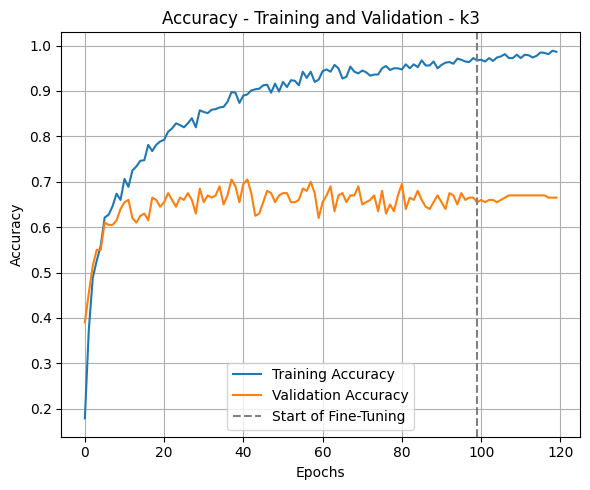

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/accuracy_genre_mel_k3.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/acc_total_k3.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/val_acc_total_k3.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k3.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


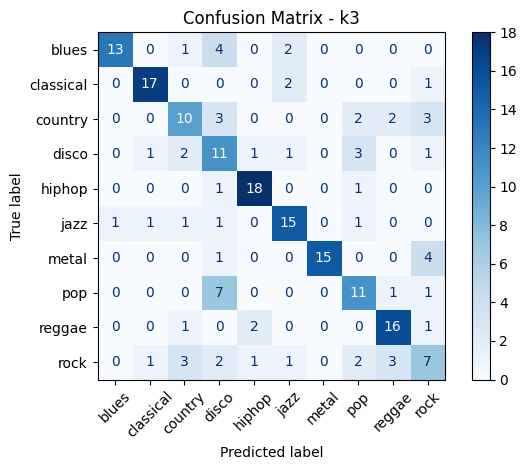

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k3")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/confusionmatrix_genre_mel_k3.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=4

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento4.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training4")
VAL_DATASET = os.path.join("/content", "validation4")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 ResNet-specific normalization

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


base_model.trainable = False
#for layer in base_model.layers[:-80]:  # ou -100
#    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 902ms/step - accuracy: 0.1390 - loss: 7.4319 - val_accuracy: 0.3350 - val_loss: 2.1515
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.3634 - loss: 2.1325 - val_accuracy: 0.4450 - val_loss: 1.5360
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 0.4572 - loss: 1.5643 - val_accuracy: 0.4800 - val_loss: 1.4083
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.5266 - loss: 1.3792 - val_accuracy: 0.5400 - val_loss: 1.3326
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.5327 - loss: 1.2754 - val_accuracy: 0.5700 - val_loss: 1.1856
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.5670 - loss: 1.2545 - val_accuracy: 0.5650 - val_loss: 1.2274
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.6167 - loss: 1.0614 - val_accuracy: 0.5900 - val_loss: 1.1672
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.6639 - loss: 0.9799 - 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-6]:
    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 449ms/step - accuracy: 0.9607 - loss: 0.1504 - val_accuracy: 0.7700 - val_loss: 1.1643
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.9762 - loss: 0.1281 - val_accuracy: 0.7700 - val_loss: 1.1583
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.9710 - loss: 0.1187 - val_accuracy: 0.7750 - val_loss: 1.1546
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.9834 - loss: 0.1164 - val_accuracy: 0.7800 - val_loss: 1.1542
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.9679 - loss: 0.1394 - val_accuracy: 0.7800 - val_loss: 1.1527
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.9635 - loss: 0.1274 - val_accuracy: 0.7800 - val_loss: 1.1516
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.9793 - loss: 0.1122 - val_accuracy: 0.7800 - val_loss: 1.1499
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 450ms/step - accuracy: 0.9722 - loss: 0.1182 - val_accu

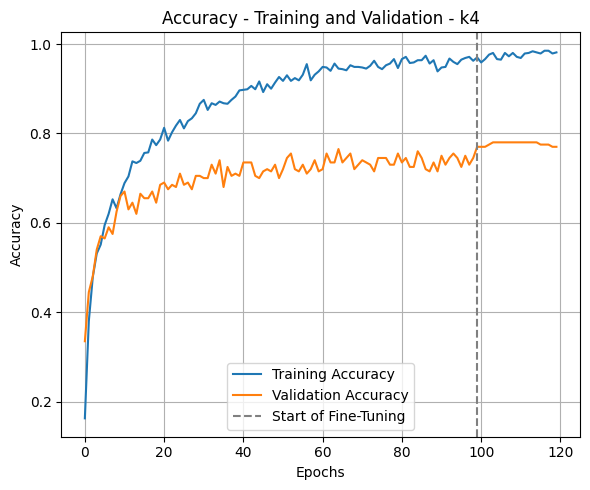

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/accuracy_genre_mel_k4.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/acc_total_k4.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/val_acc_total_k4.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k4.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k4.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


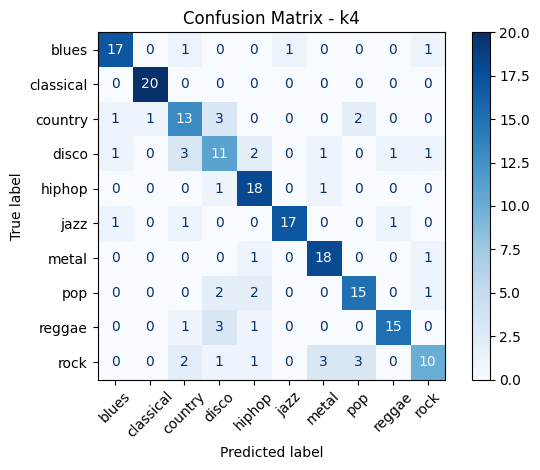

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k4")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/confusionmatrix_genre_mel_k4.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=5

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento5.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training5")
VAL_DATASET = os.path.join("/content", "validation5")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 ResNet-specific normalization
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 ResNet-specific normalization

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)


base_model.trainable = False
#for layer in base_model.layers[:-80]:  # ou -100
#    layer.trainable = False


model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 804ms/step - accuracy: 0.1595 - loss: 4.6268 - val_accuracy: 0.3950 - val_loss: 1.6601
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.4089 - loss: 1.7590 - val_accuracy: 0.4900 - val_loss: 1.5501
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.5395 - loss: 1.3694 - val_accuracy: 0.5500 - val_loss: 1.3994
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 426ms/step - accuracy: 0.5754 - loss: 1.2283 - val_accuracy: 0.5200 - val_loss: 1.3132
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.6174 - loss: 1.1084 - val_accuracy: 0.5700 - val_loss: 1.2785
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.6204 - loss: 1.0662 - val_accuracy: 0.5550 - val_loss: 1.2801
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 459ms/step - accuracy: 0.6460 - loss: 1.0091 - val_accuracy: 0.6050 - val_loss: 1.2352
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.6743 - loss: 0.9280 - 

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-6]:
    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 444ms/step - accuracy: 0.9798 - loss: 0.1159 - val_accuracy: 0.6650 - val_loss: 1.3653
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.9575 - loss: 0.1480 - val_accuracy: 0.6700 - val_loss: 1.3627
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.9747 - loss: 0.1240 - val_accuracy: 0.6700 - val_loss: 1.3637
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.9758 - loss: 0.1248 - val_accuracy: 0.6750 - val_loss: 1.3657
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.9719 - loss: 0.1155 - val_accuracy: 0.6750 - val_loss: 1.3695
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.9768 - loss: 0.1192 - val_accuracy: 0.6750 - val_loss: 1.3742
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.9757 - loss: 0.1149 - val_accuracy: 0.6750 - val_loss: 1.3785
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.9816 - loss: 0.1146 - val_accu

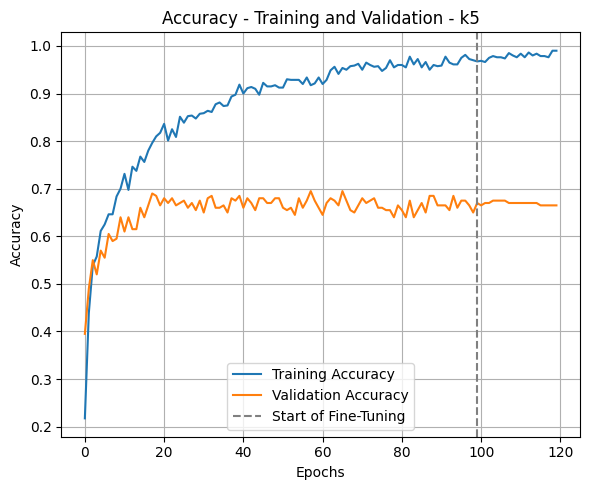

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/accuracy_genre_mel_k5.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/acc_total_k5.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/val_acc_total_k5.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k5.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/model_k5.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


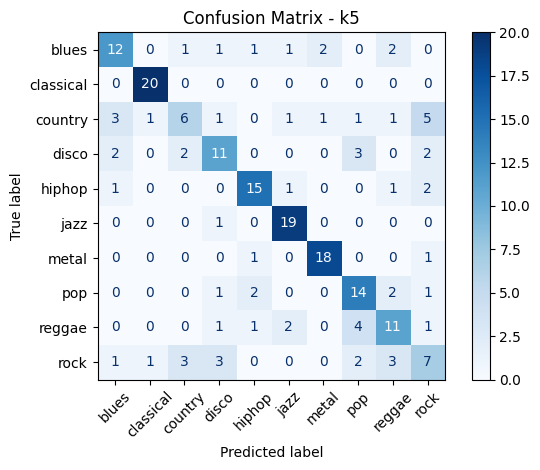

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k5")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold/confusionmatrix_genre_mel_k5.pdf')
plt.show()

In [4]:
from google.colab import runtime
runtime.unassign()

# Geração de Tabela

In [2]:
import numpy as np
import pandas as pd
import os

# Diretório base onde os arquivos estão salvos
base_path = "/content/drive/MyDrive/Musical Genre Classification/Resultados/vgg16_genre_spec_mel_kfold"

# Inicializa dicionários para os resultados
final_train_acc = {}
max_train_acc = {}
final_val_acc = {}
max_val_acc = {}

# Loop para k = 1 até 5
for k in range(1, 6):
    acc_path = os.path.join(base_path, f"acc_total_k{k}.npy")
    val_acc_path = os.path.join(base_path, f"val_acc_total_k{k}.npy")

    acc = np.load(acc_path)
    val_acc = np.load(val_acc_path)

    final_train_acc[f'k{k}'] = acc[-1]
    max_train_acc[f'k{k}'] = np.max(acc)
    final_val_acc[f'k{k}'] = val_acc[-1]
    max_val_acc[f'k{k}'] = np.max(val_acc)

# Calcula a média e desvio padrão para cada linha
def add_resultado_final_std(row):
    valores = np.array([v for v in row.values()])
    return np.mean(valores), np.std(valores)

# Construindo DataFrame
df = pd.DataFrame({
    "Acurácia Final - Treinamento": final_train_acc,
    "Valor Máximo Acurácia - Treinamento": max_train_acc,
    "Acurácia Final - Validação": final_val_acc,
    "Valor Máximo Acurácia - Validação": max_val_acc
}).T

# Adiciona colunas de média e desvio padrão
df["Resultado Final"] = df.mean(axis=1)
df["Desvio Padrão"] = df.std(axis=1)

In [3]:
df

,k1,k2,k3,k4,k5,Resultado Final,Desvio Padrão
Acurácia Final - Treinamento,0.98125,0.98625,0.98625,0.98125,0.990,0.985,0.003354
Valor Máximo Acurácia - Treinamento,0.98250,0.98875,0.98875,0.98500,0.990,0.987,0.002806
Acurácia Final - Validação,0.76000,0.74500,0.66500,0.77000,0.665,0.721,0.046411
Valor Máximo Acurácia - Validação,0.76500,0.77000,0.70500,0.78000,0.695,0.743,0.035581
